# ✅ 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
# Modeling & Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Aesthetics
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings('ignore')

# ✅ 2:Read and Analysis

In [2]:
dataset=pd.read_csv(r'D:\Projects\projects_uncomplet\House Price Prediction\data\kc_house_data.csv')

#### shape

In [3]:
print("Shape:", dataset.shape)

Shape: (21613, 21)


#### Info

In [4]:
print("Info:")
dataset.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  

#### Missing Values

In [5]:
print("\nMissing Values:")
print(dataset.isna().sum())


Missing Values:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_lot         0
sqft_above       0
sqft_basement    0
dtype: int64


#### describe

In [6]:
display(dataset.describe())

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,1.510697e+04,1788.390691,291.509045
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,4.142051e+04,828.090978,442.575043
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5.200000e+02,290.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,5.040000e+03,1190.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,7.618000e+03,1560.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.068800e+04,2210.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.651359e+06,9410.000000,4820.000000


#### First five rows

In [7]:
print("\nFirst five rows:")
display(dataset.head())


First five rows:


,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


#### duplicated

In [8]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [9]:
numCol=dataset.select_dtypes(include="number")
numCol.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,221900.0,3,1.00,1180,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,538000.0,3,2.25,2570,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,180000.0,2,1.00,770,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,604000.0,4,3.00,1960,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,510000.0,3,2.00,1680,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


In [10]:
objCol=dataset.select_dtypes(include="object")
objCol.head()

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000


# ✅ 3:feature selection & Extraction

#### Convert the 'date' column to proper datetime objects

In [11]:
# The format in King County data is usually 'YYYYMMDDT000000'
dataset['date'] = pd.to_datetime(dataset['date'])

In [12]:
# Calculating Property Age at time of sale
dataset['house_age'] = dataset['date'].dt.year - dataset['yr_built']

In [13]:
# Renovation Proxy: Years since last renovation (or since built if never renovated)
dataset['years_since_renovation'] = np.where(dataset['yr_renovated'] == 0, 
                                        dataset['date'].dt.year - dataset['yr_built'], 
                                        dataset['date'].dt.year - dataset['yr_renovated'])
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement,house_age,years_since_renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,5650,1180,0,59,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,7242,2170,400,63,23
2,5631500400,2015-02-25,180000.0,2,1.00,770,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,10000,770,0,82,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,5000,1050,910,49,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,8080,1680,0,28,28


#### drop unnecessary coloumns

In [14]:
database = dataset.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)

#### Multicollinearity Check (Correlation Matrix)

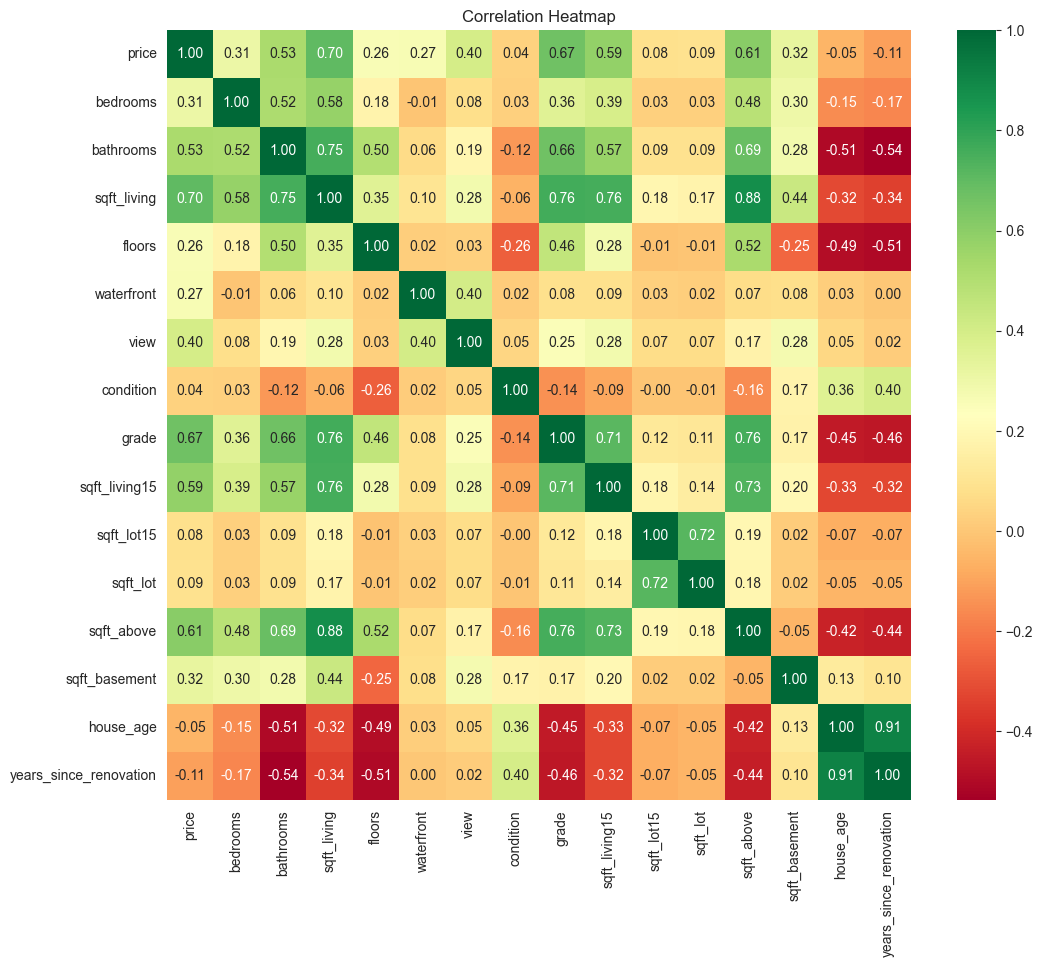

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(database.corr(), annot=True, fmt=".2f", cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

#### House Price Distribution

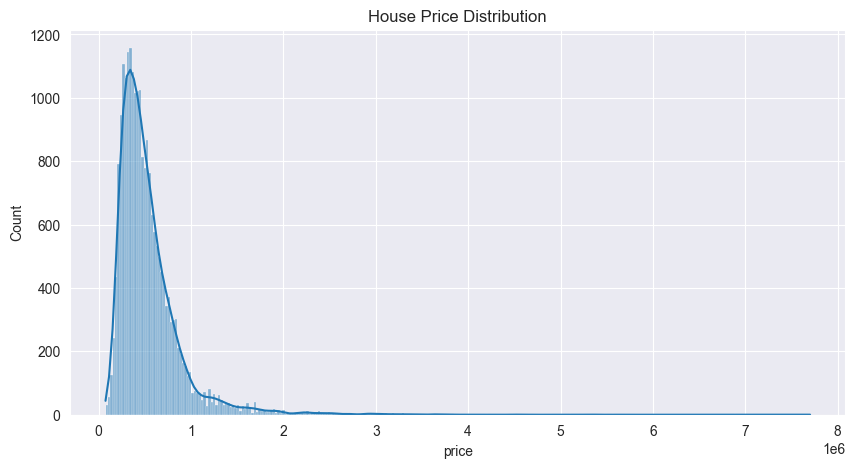

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(dataset['price'], kde=True)
plt.title('House Price Distribution')
plt.show()

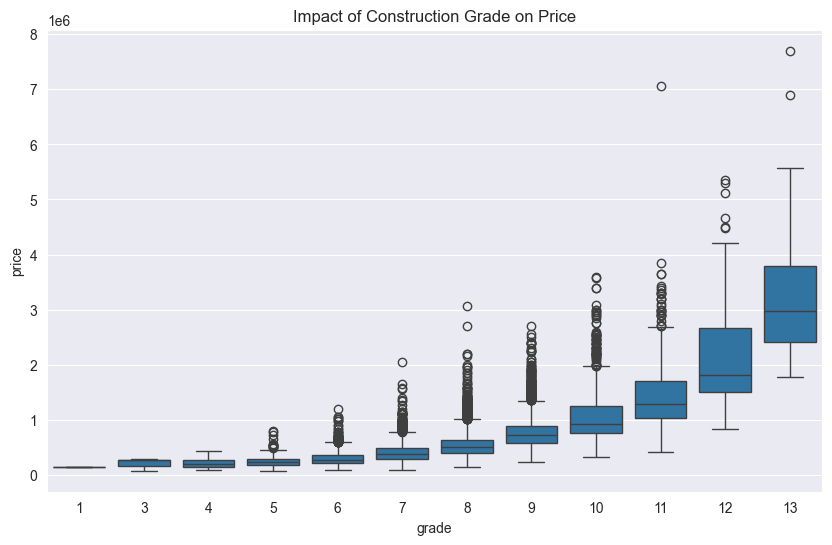

In [17]:
# Analyzing price vs Quality Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=database)
plt.title('Impact of Construction Grade on Price')
plt.show()

#### Insight: 'Grade' shows a clear exponential relationship with price. 
### This confirms that construction quality is a primary price driver in King County.

# ✅ 4: Handle Outliers (IQR Capping)

In [18]:
for col in database.select_dtypes(include='number'):
    Q1 = database[col].quantile(0.25)
    Q3 = database[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    database[col] = database[col].clip(lower=lower, upper=upper)

# ✅ 5: Visualize

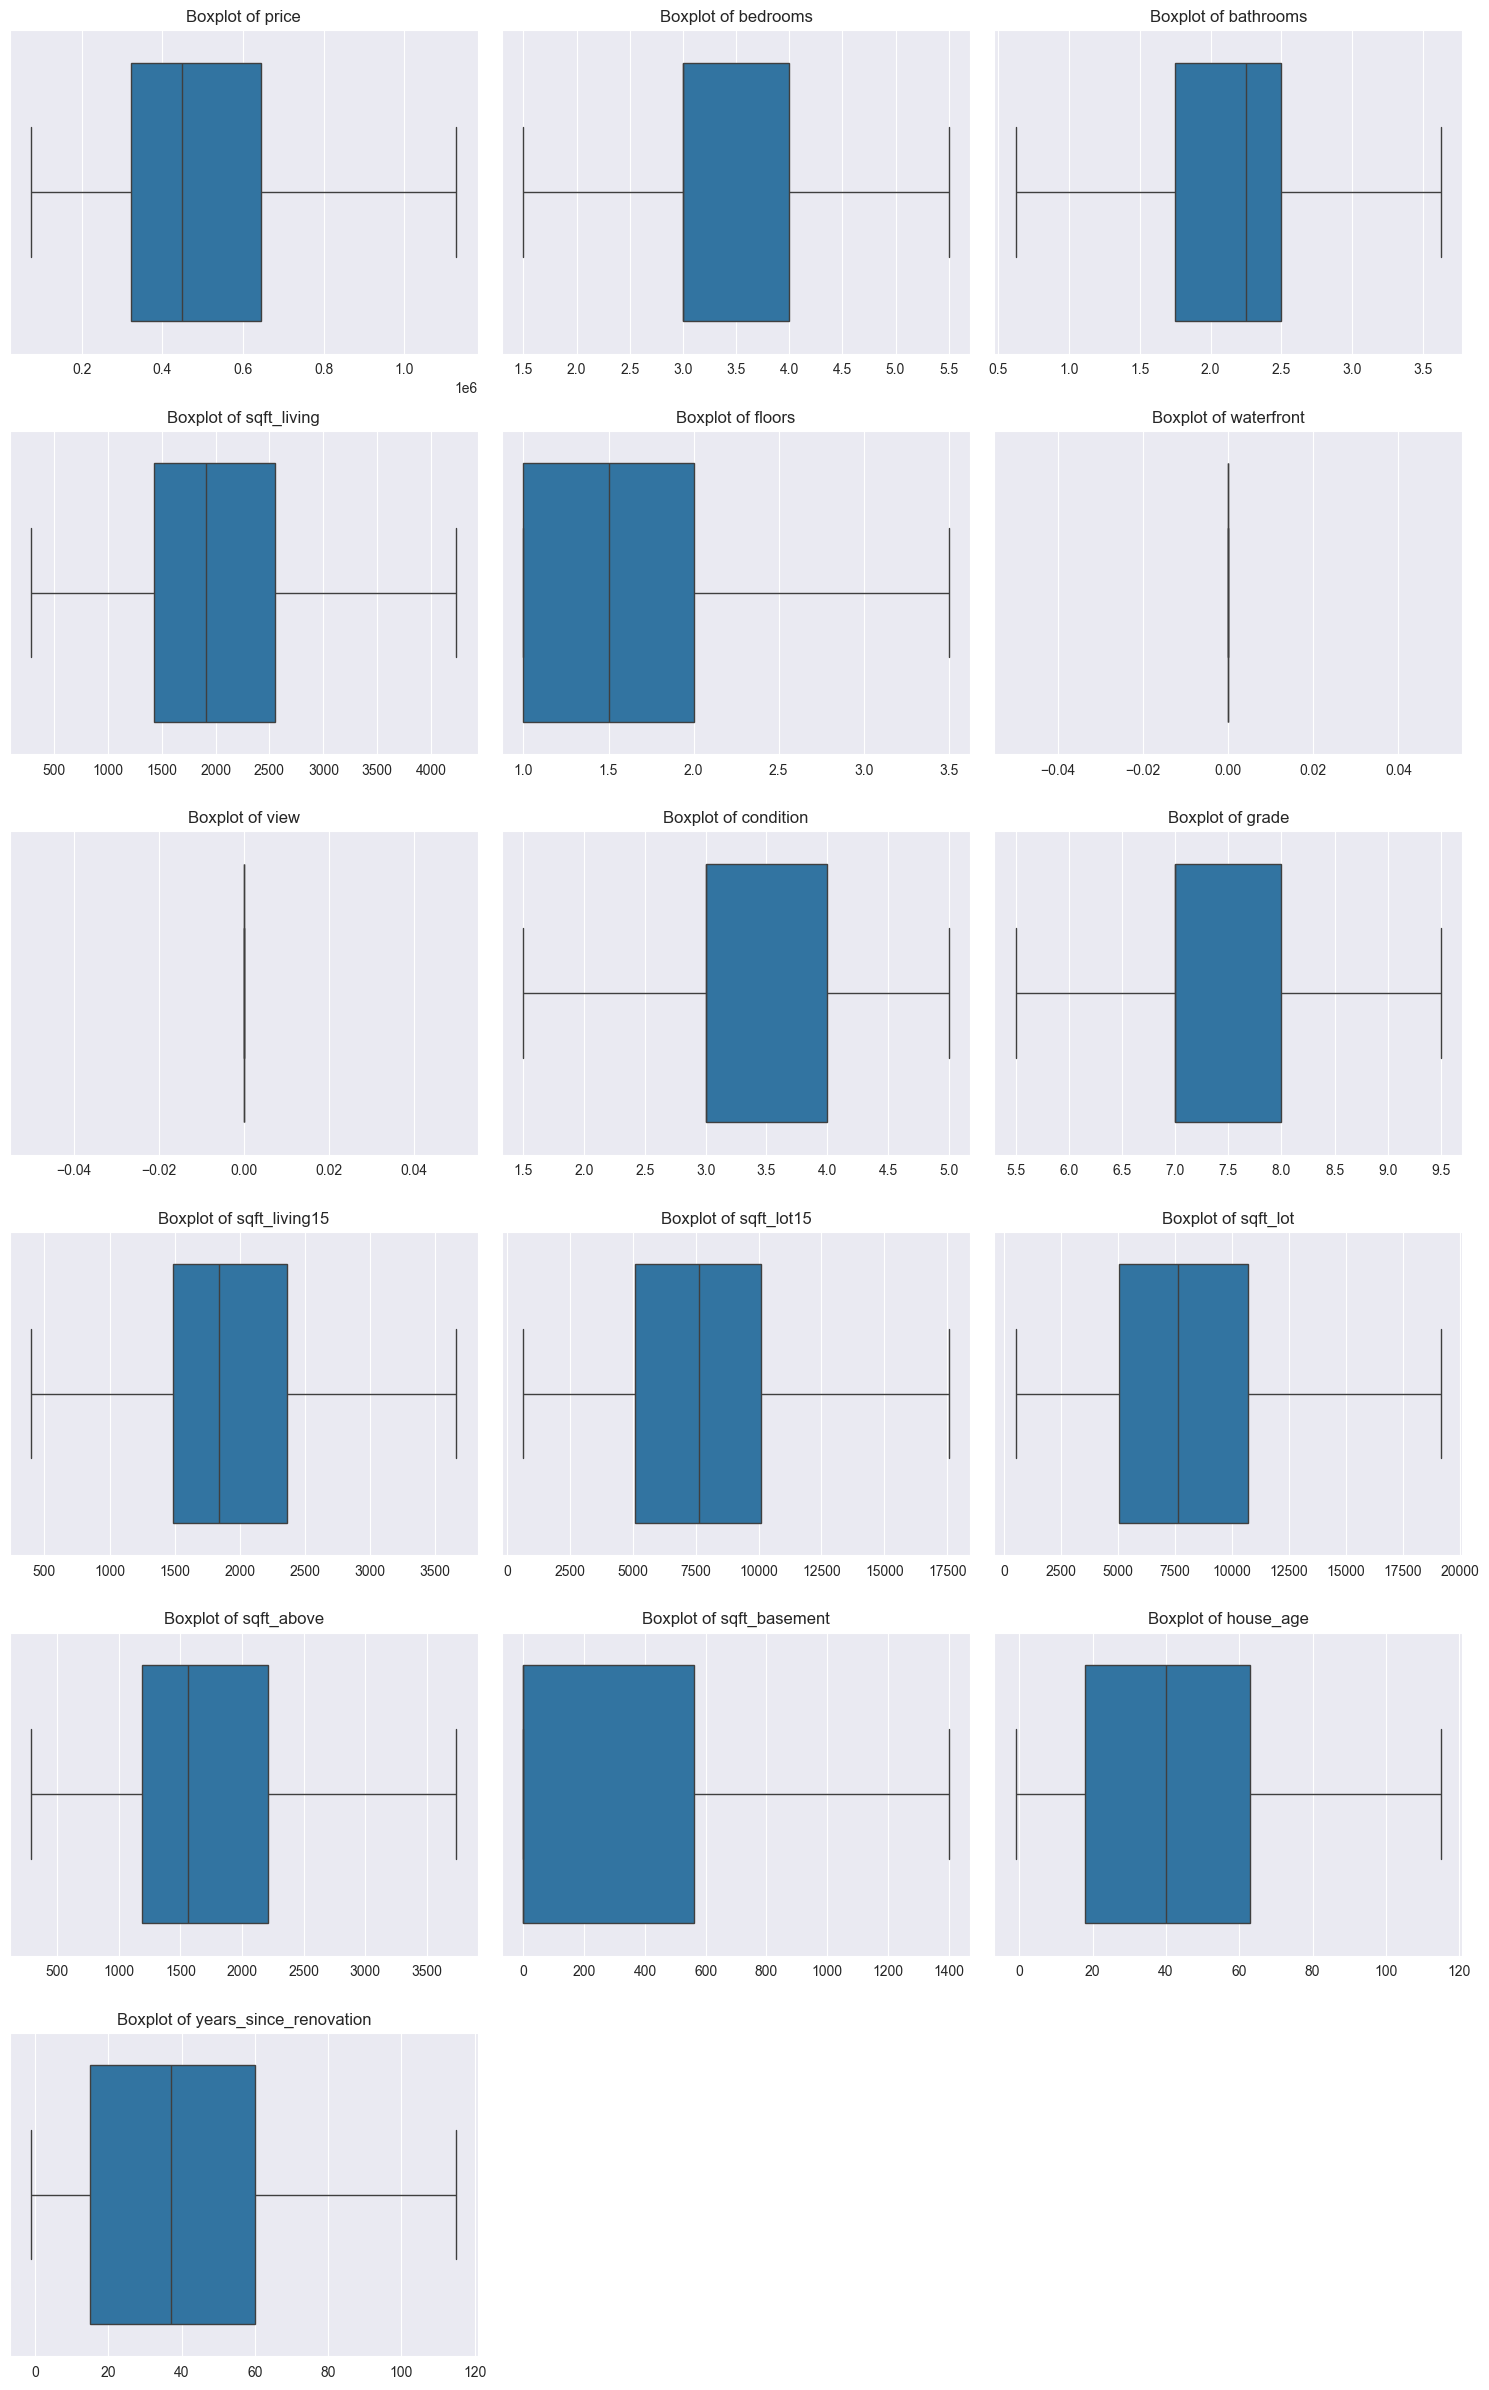

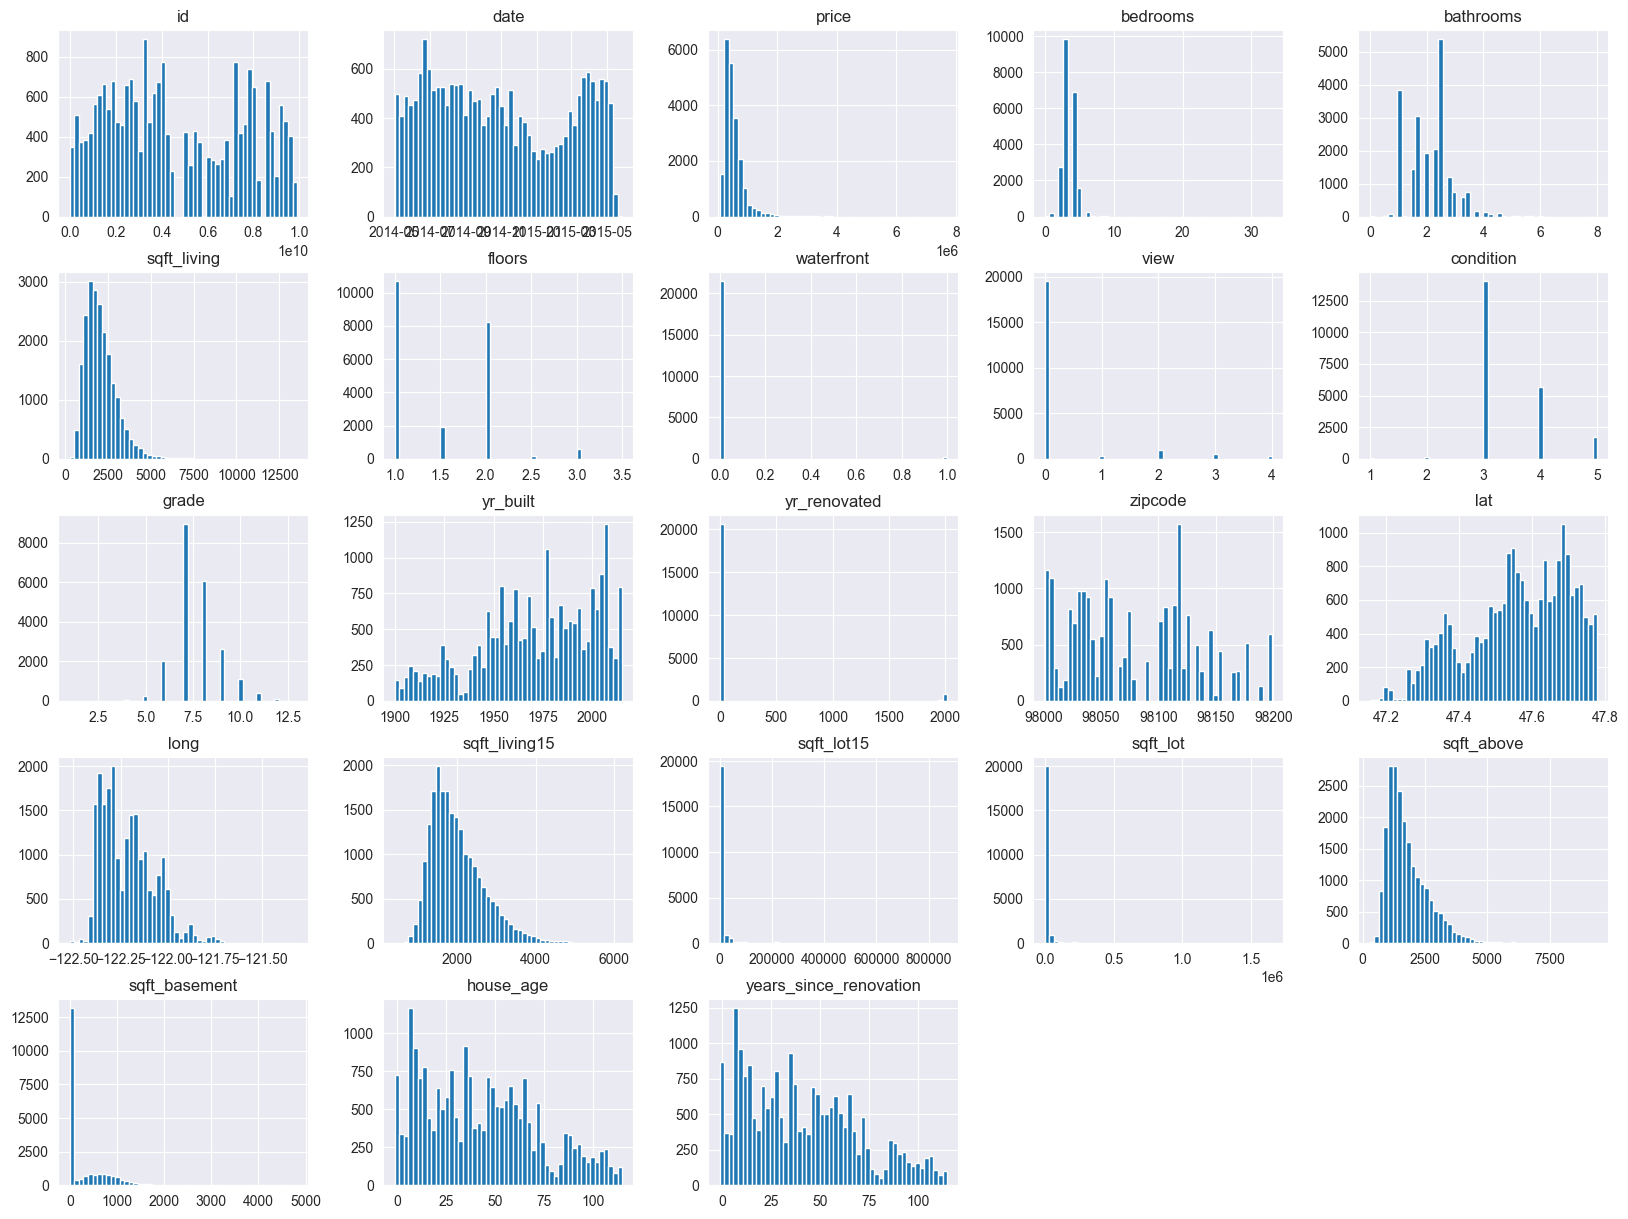

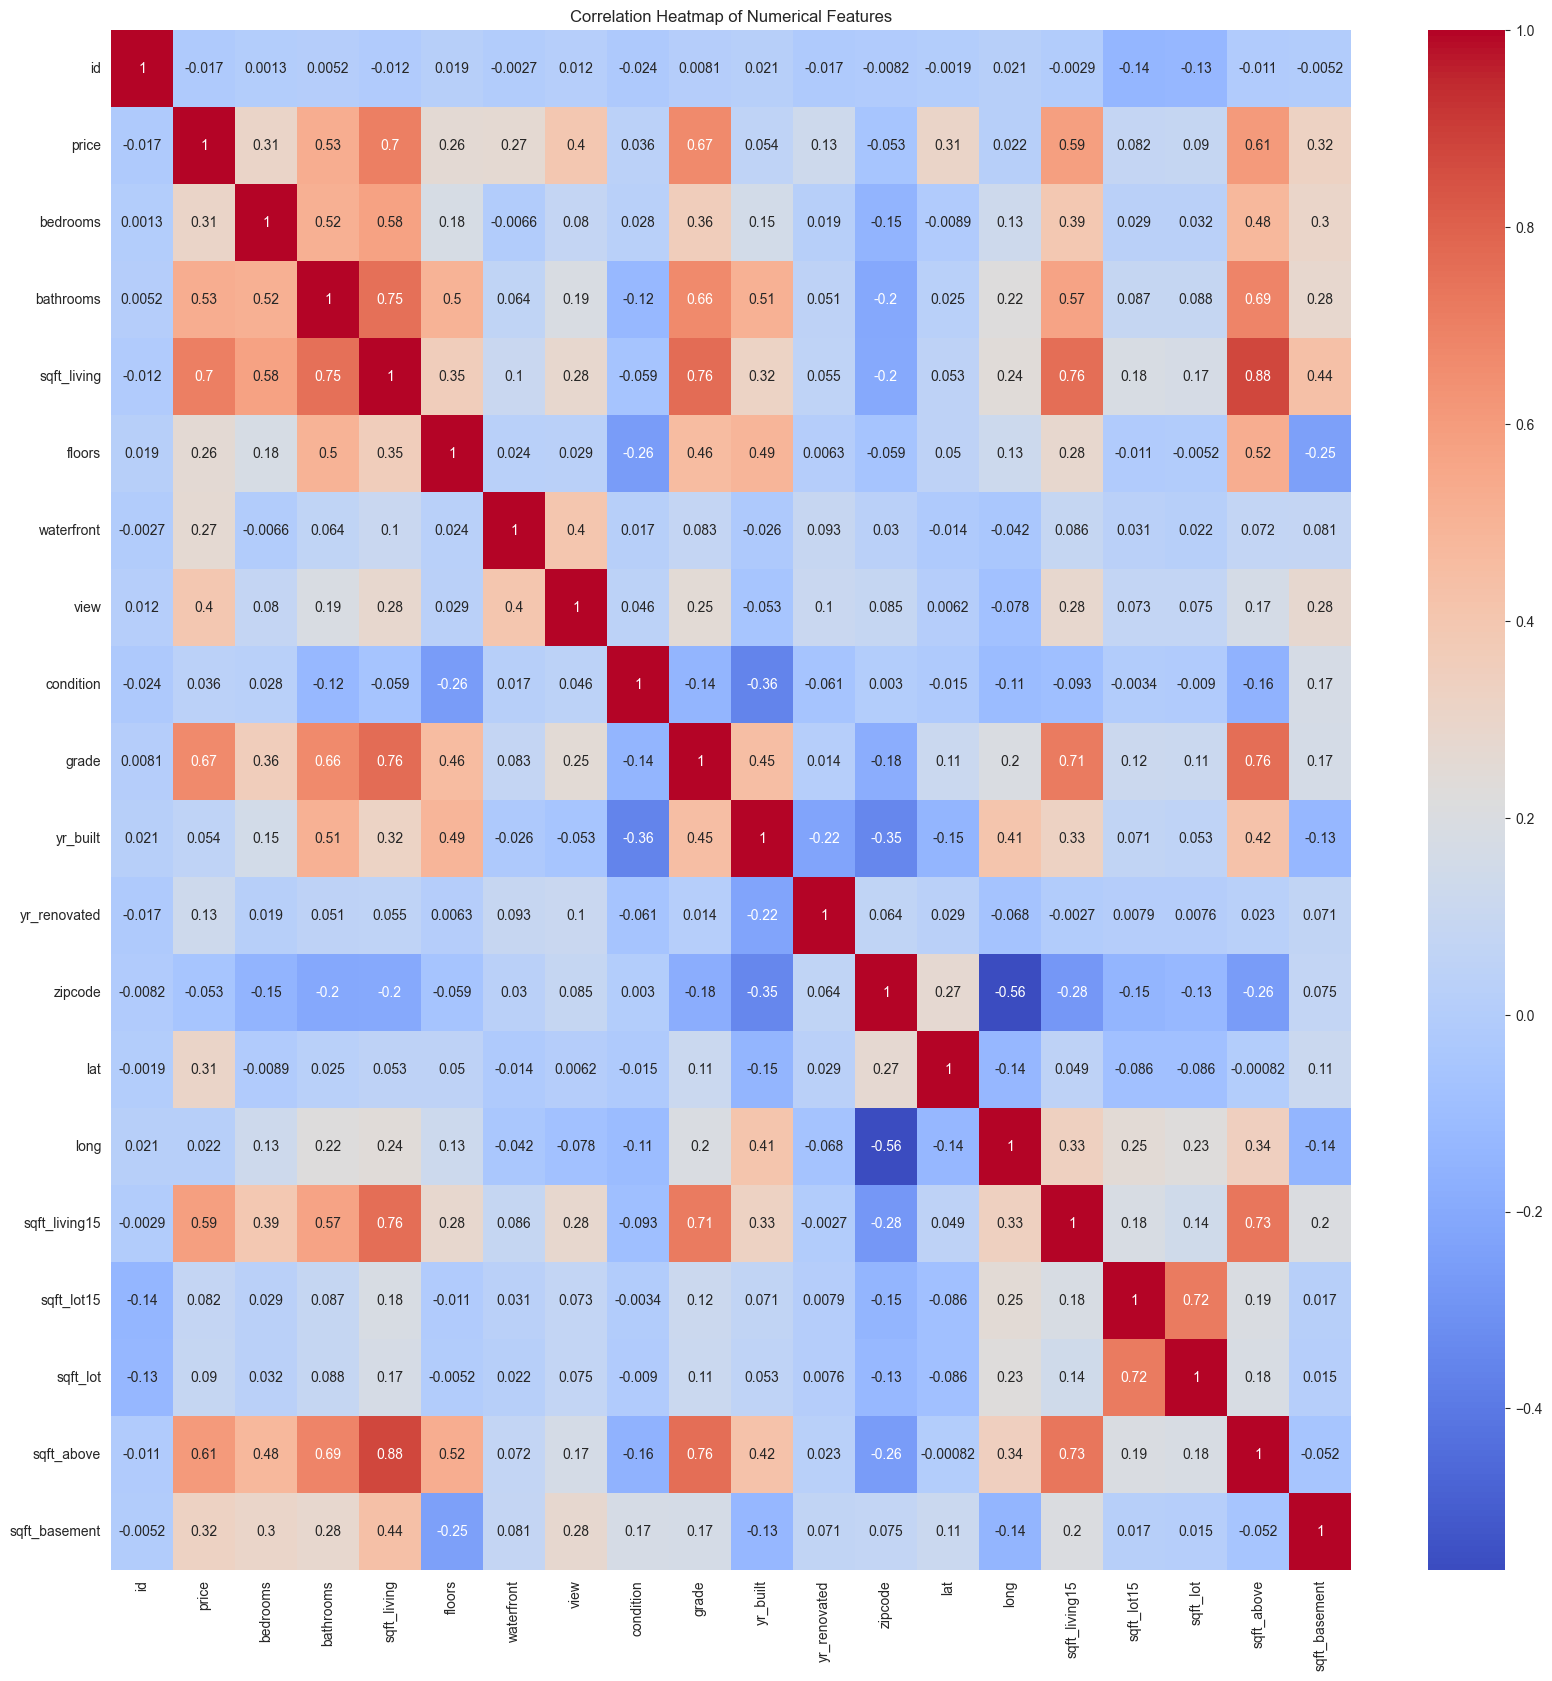

In [19]:
n_cols = 3
n_features = len(database.columns)
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(database.columns):
    sns.boxplot(x=database[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")
    axes[i].set_xlabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
dataset.hist(bins=50, figsize=(20,15))
plt.show()
plt.figure(figsize=(20, 20))
sns.heatmap(numCol.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# ✅ 6: Train-Test Split

In [20]:
X = dataset.drop('price', axis=1)
y = dataset['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
# Select numeric features safely
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

In [22]:
# Define the Preprocessor
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [24]:
# Define the Model Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=300, 
        max_depth=5, 
        learning_rate=0.05, 
        random_state=42
    ))
])

#### Insight: Pipelines prevent 'Data Leakage' by ensuring that scaling parameters 
#### are only calculated from the training set and then applied to the test set.

# ✅ 7: Train Linear Regression Model

In [25]:
# Run Cross-Validation on Training Set
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print(f"Cross-Validated R2 Scores: {cv_results}")
print(f"Mean R2 Score: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

Cross-Validated R2 Scores: [0.89383772 0.88792433 0.89224848 0.89197675 0.89484059]
Mean R2 Score: 0.8922 (+/- 0.0024)


In [26]:
# Final Fit
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# ✅ 8:Prediction

In [27]:
y_pred = model.predict(X_test)

# Metrics Calculation
print(f"Test R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.0f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.0f}")

Test R2 Score: 0.8711
MAE: $70,455
RMSE: $139,693


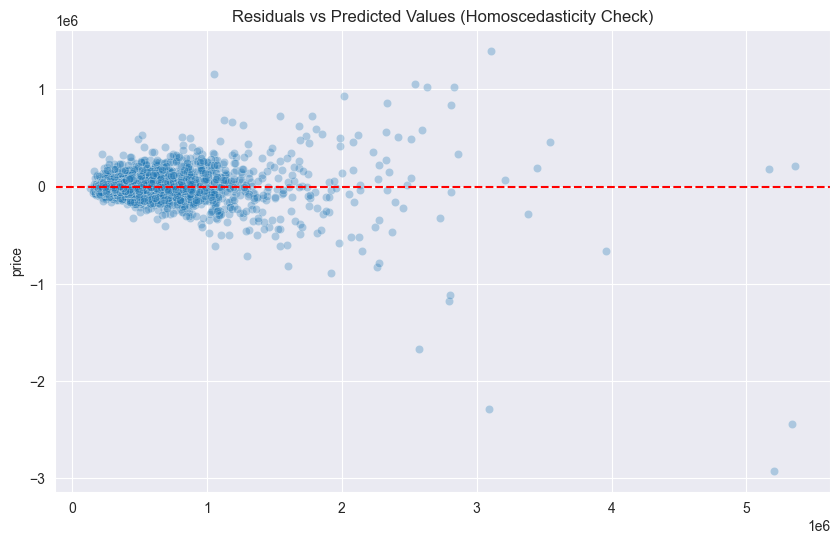

In [28]:
# Residual Analysis
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3)
plt.axhline(0, color='red', ls='--')
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.show()

#### Final Insight: The random distribution of residuals around the zero-line 
#### suggests that the model has captured the main patterns and the errors are stochastic.

In [29]:
print('Predicted Value for LinearRegressionModel is : ' , y_pred[:10])
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print("\n### Evaluation Metrics ###")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Predicted Value for LinearRegressionModel is :  [ 386715.59722531  847068.98674078 1182814.26166083 2150250.93931695
  858726.55638825  249072.08769157  769579.37743371  628003.11815841
  438323.11734624  592413.57490645]

### Evaluation Metrics ###
Mean Absolute Error (MAE): 70455.4306
Mean Squared Error (MSE): 19514017179.0336
Root Mean Squared Error (RMSE): 139692.5810
R² Score: 0.8711


### Scatter plot of Actual vs Predicted

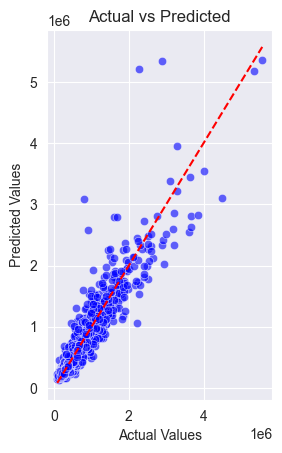

In [30]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

### Residual plot (Error distribution)

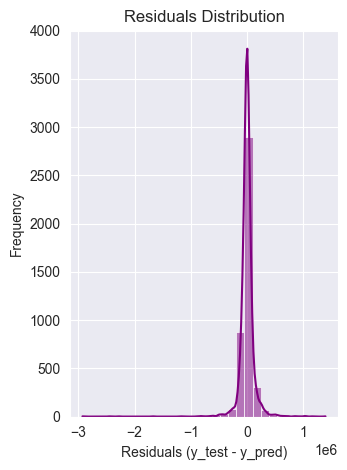

In [31]:
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals (y_test - y_pred)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()